# Random walk modelling

During this seminar we will immulate the random walk on knight's network, which you should build in the first place.

Consider $n \times n$ chessboard with a single knight on it. 
<br\>
1. Construct a network with all knight's possible moves. In this network each node represents chessboard locations and an edge between two locations appears if knight is admitted to move from one to another.
2. Implement simulation of knight random walk on chessboard

    * Calculate average probability to visit chessboard locations
    * Calculate average recurrence time of a node

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice, rand
import networkx as nx
%matplotlib inline

### Knight's Network

In [8]:
def GenKnightNetwork(boardSize):
    G = nx.Graph()
    pos = {}
    for row in xrange(boardSize):
        for col in xrange(boardSize):
            nodeId = row + col*boardSize
            pos[nodeId] = np.array([1.0*row/boardSize, 1.0*col/boardSize])
            newPos = GetLegalMoves(row,col,boardSize)
            for e in newPos:
                nid = e[0] + e[1]*boardSize
                G.add_edge(nodeId,nid)
    return G, pos
                
                
def GetLegalMoves(x,y,boardSize):
    newMoves = []
    moveOffsets = [(-1,-2),(-1,2),(-2,-1),(-2,1),
                   ( 1,-2),( 1,2),( 2,-1),( 2,1)]
    for i in moveOffsets:
        newX = x + i[0]
        newY = y + i[1]
        if isLegalCoord(newX,boardSize) and \
                            isLegalCoord(newY,boardSize):
                newMoves.append((newX,newY))
    return newMoves
    
def isLegalCoord(x,boardSize):
    if x>=0 and x < boardSize:
        return True
    else:
        return False

In [9]:
boardSize = 8
(G,pos) = GenKnightNetwork(boardSize)

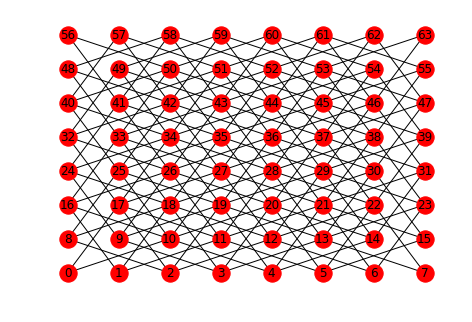

In [20]:
nx.draw(G,pos,with_labels=True)

### Random Walk Process

In [34]:
def RandomWalk(G, xi, n , till_first_return = False):
    nodeSeq = []
    nodeSeq.append(xi)
    if till_first_return:
        xInit = xi
        while True:
            neig = list(G.neighbors(xi))
            xi = choice(neig,1)[0]
            nodeSeq.append(xi)
            if xi == xInit:
                return nodeSeq
    else:
        for i in xrange(n):
            neig = list(G.neighbors(xi))
            xi = choice(neig,1)[0]
            nodeSeq.append(xi)
        return nodeSeq

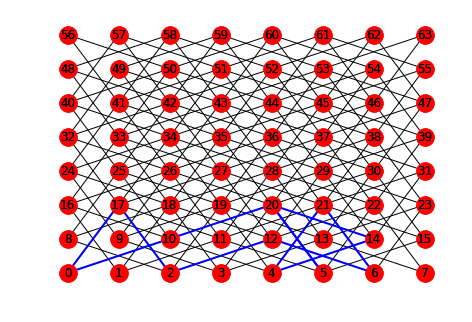

In [37]:
nodeSeq = RandomWalk(G,0,100,True)
edgeSeq = [(nodeSeq[i-1], nodeSeq[i]) for i in xrange(1,len(nodeSeq))]
nx.draw(G,pos,with_labels=True)
nx.draw(G,pos,edgelist = edgeSeq, edge_color='blue',width = 2,with_labels=True)

In [39]:
nodeSeq = []
for xi in xrange(G.number_of_nodes()):
    nodeSeq.append(RandomWalk(G,xi,1000))

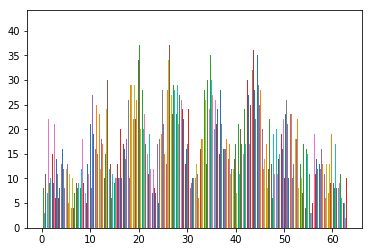

In [53]:
h = plt.hist(nodeSeq, bins = G.number_of_nodes())

<Container object of 64 artists>

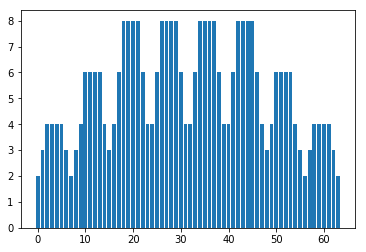

In [60]:
plt.bar(range(0,64), dict(G.degree()).values())

In [65]:
returnTime = []
for i in xrange(100):
    returnTime.append(len(RandomWalk(G,27,0,True)))

{'boxes': [<matplotlib.lines.Line2D at 0x7f9c7051ea90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9c71581890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c71f626d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c70440590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9c72018750>,
  <matplotlib.lines.Line2D at 0x7f9c834cb5d0>]}

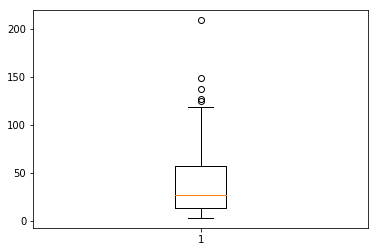

In [66]:
plt.boxplot(returnTime)